# Springboard Data Analytics Assignment

**Author:** Marcella Morgan
**Image Credit:** Images generated with the help of ChatGPT (OpenAI).
![Lady tasting tea + normal curve](images/lady_drinking_tea.png)


## Introduction  

In this assignment I’m working through four problems that all use simulation to explore different ideas in statistics.  

1. **Lady Tasting Tea (Extended):**  
   I’ll extend the classic experiment to 12 cups instead of 8, simulate the chance of guessing correctly, and compare the results to the original setup.  

2. **Normal Distribution:**  
   I’ll generate lots of small samples from a normal distribution and compare the sample standard deviation (ddof=1) with the population version (ddof=0). The goal is to see the difference on histograms and think about what happens with bigger samples.  

3. **t-Tests and Type II Errors:**  
   Here I’ll run simulations of t-tests while changing the difference in means. I’ll measure how often the test fails to reject the null when it should (type II errors) and see how that changes as the effect gets stronger.  

4. **ANOVA vs t-Tests:**  
   I’ll generate three groups with different means and compare running one ANOVA versus doing three separate t-tests. The point is to see why ANOVA is better when looking at more than two groups.  

Overall, the assignment is about practicing simulation, interpreting results, and understanding why we choose one statistical test over another.  


## Problem 1: Lady Testing Tea

In this section, we replicate and extend the classic Lady Tasting Tea experiment. The original design had 8 cups (4 tea-first, 4 milk-first). By chance, the probability of guessing correctly was small but non-negligible. Here, we increase the challenge by preparing 12 cups (8 tea-first and 4 milk-first). We simulate this setup repeatedly by shuffling the cups, recording how often the participant could identify all cups correctly purely by guessing. We then compare the estimated probability with the original experiment, interpret its implications for statistical power, and reflect on whether one might reasonably tighten or relax the significance threshold (p-value) when moving from the original 8-cup design to this 12-cup version.



Running the experiment for 8 cups first:

In [21]:
import numpy as np

n_simulations = 100_000
successes = 0

for _ in range(n_simulations):
    # Step 2: random guess
    guess = np.random.choice(8, size=4, replace=False)
    
    # Step 3: check success
    if set(guess) == {0, 1, 2, 3}:
        successes += 1

# Step 6: estimate probability
estimated_probability = successes / n_simulations
estimated_probability


0.01348

Now running it for 12

In [20]:
import numpy as np

n_simulations = 100_000
successes = 0

for _ in range(n_simulations):
    # Step 2: random guess
    guess = np.random.choice(12, size=4, replace=False)
    
    # Step 3: check success
    if set(guess) == {0, 1, 2, 3}:
        successes += 1

# Step 6: estimate probability
estimated_probability = successes / n_simulations
estimated_probability


0.00199

So the chance of selecting the correct cups at random looks pretty low. So my hypothesis is that the lady can tell if the tea is poured before the milk is.

Let's now test this hypothesis. 

The Null hypothesis is:
The lady is guessing. She can't tell.

But I don't think she's guessing. So I'm going to put forwards an alternative hypothesis:
The lady knows her tea. She is not selecting the cups at random and making lucky guesses.

## Problem 2: 

This task demonstrates the distinction between sample standard deviation (unbiased estimator) and population standard deviation (biased but lower variance). We generate a very large number of small samples (100,000 samples of size 10) from a standard normal distribution. For each, we calculate the standard deviation using two different definitions:

ddof=0: divides by n, appropriate for a full population.

ddof=1: divides by n-1, correcting bias when estimating from a sample.

We then plot histograms of these results on the same axes, using transparency to highlight differences. The visualization should reveal a small but systematic shift between the two. We conclude by discussing how increasing the sample size would shrink this difference, illustrating the consistency of estimators.

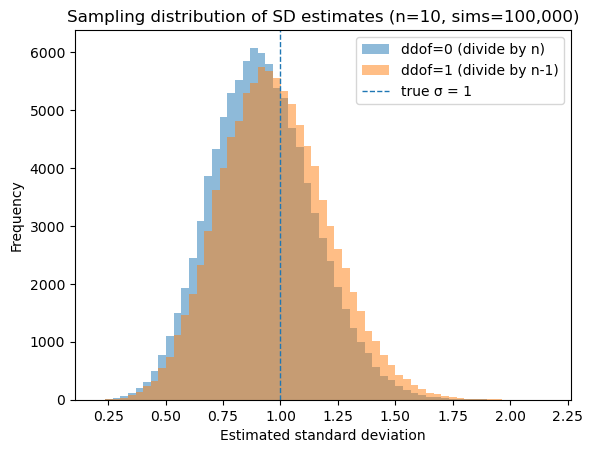

Mean(sd, ddof=0): 0.9234252633979069
Mean(sd, ddof=1): 0.9733756937594341
Mean difference: 0.04995043036152724


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1–2) params
rng = np.random.default_rng(42)
n_sims = 100_000
n = 10

# 3) generate samples
X = rng.standard_normal(size=(n_sims, n))

# 4) compute sd with ddof=0 and ddof=1
sd0 = np.std(X, axis=1, ddof=0)
sd1 = np.std(X, axis=1, ddof=1)

# 5) common bins
bins = np.linspace(min(sd0.min(), sd1.min()), max(sd0.max(), sd1.max()), 60)

plt.hist(sd0, bins=bins, alpha=0.5, label="ddof=0 (divide by n)")
plt.hist(sd1, bins=bins, alpha=0.5, label="ddof=1 (divide by n-1)")

# 6) reference + labels
plt.axvline(1.0, linestyle="--", linewidth=1, label="true σ = 1")
plt.title(f"Sampling distribution of SD estimates (n={n}, sims={n_sims:,})")
plt.xlabel("Estimated standard deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Mean(sd, ddof=0):", sd0.mean())
print("Mean(sd, ddof=1):", sd1.mean())
print("Mean difference:", (sd1 - sd0).mean())


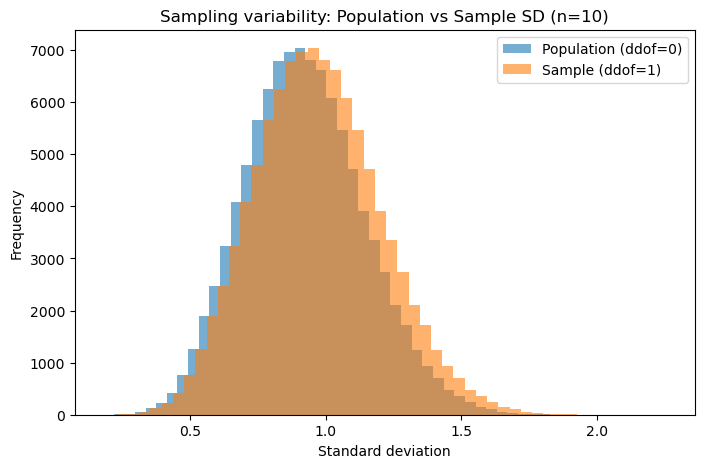

In [16]:
# Parameters
n_samples = 100_000   # number of repeated samples
sample_size = 10       # how many values in each sample

# Generate samples from a standard normal distribution (mean=0, std=1)
samples = np.random.randn(n_samples, sample_size)

# Calculate standard deviation two ways:
# ddof = 0 → divide by n (population)
# ddof = 1 → divide by n - 1 (sample)
std_pop = np.std(samples, axis=1, ddof=0)
std_sample = np.std(samples, axis=1, ddof=1)

# Plot histograms
plt.figure(figsize=(8,5))
plt.hist(std_pop, bins=50, alpha=0.6, label='Population (ddof=0)')
plt.hist(std_sample, bins=50, alpha=0.6, label='Sample (ddof=1)')
plt.xlabel('Standard deviation')
plt.ylabel('Frequency')
plt.title('Sampling variability: Population vs Sample SD (n=10)')
plt.legend()
plt.show()

## Problem 3:

In this section, we investigate type II errors, which occur when a test fails to reject the null hypothesis despite there being a true difference. We systematically vary the mean difference (d) between two normal distributions, from 0 to 1.0 in steps of 0.1. For each value of d:

Draw two samples of size 100 (one from N(0,1), the other from N(d,1)).

Perform an independent two-sample t-test, using a 5% significance level.

Repeat the process 1,000 times and record the proportion of times the null hypothesis was not rejected.

We then plot type II error rates against effect size, showing the classic trade-off: small differences are harder to detect, while large differences result in low type II error. This simulation reinforces the importance of effect size and sample size in determining test power.

We pretend we have two populations that are normally distributed.

One has a mean of 0, and the other has a mean of d, where d is an effect size that we increase from 0 to 1.0 in steps of 0.1.

For each value of d, we:

Take two samples of size 100 (one from each population).

Run a two-sample t-test at the usual 5% significance level.

Repeat this 1,000 times and record how often the test fails to reject the null hypothesis.

d = 0.0, Type II Error Rate = 0.948
d = 0.1, Type II Error Rate = 0.890
d = 0.2, Type II Error Rate = 0.715
d = 0.3, Type II Error Rate = 0.444
d = 0.4, Type II Error Rate = 0.223
d = 0.5, Type II Error Rate = 0.067
d = 0.6, Type II Error Rate = 0.015
d = 0.7, Type II Error Rate = 0.002
d = 0.8, Type II Error Rate = 0.000
d = 0.9, Type II Error Rate = 0.000
d = 1.0, Type II Error Rate = 0.000


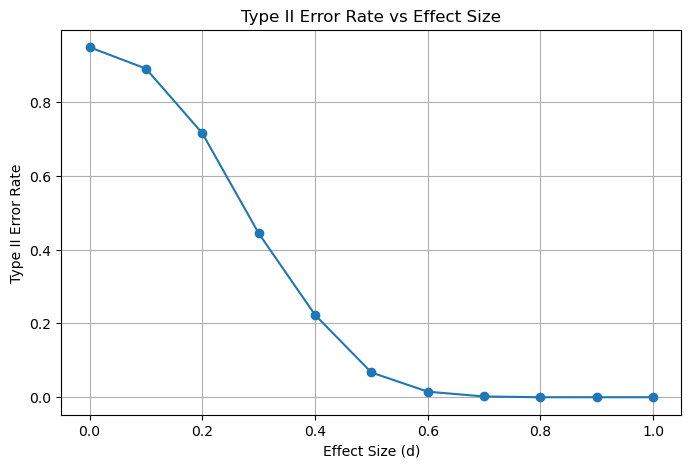

In [20]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Parameters
sample_size = 100
num_simulations = 1000
alpha = 0.05  # significance level

effect_sizes = np.arange(0, 1.1, 0.1)  # d = 0.0, 0.1, ..., 1.0
type2_errors = []  # store error rates

for d in effect_sizes:
    errors = 0

    for _ in range(num_simulations):
        # Sample from N(0,1)
        group1 = np.random.normal(loc=0, scale=1, size=sample_size)
        # Sample from N(d,1)
        group2 = np.random.normal(loc=d, scale=1, size=sample_size)

        # Two-sample independent t-test
        t_stat, p_value = ttest_ind(group1, group2)

        # Type II error: fail to reject H0 when H0 is false
        # (i.e., p > alpha even though the true means differ when d > 0)
        if p_value > alpha:
            errors += 1

    # Proportion of Type II errors
    type2_rate = errors / num_simulations
    type2_errors.append(type2_rate)
    print(f"d = {d:.1f}, Type II Error Rate = {type2_rate:.3f}")

# ---- Plotting ---- #
plt.figure(figsize=(8, 5))
plt.plot(effect_sizes, type2_errors, marker='o')
plt.xlabel("Effect Size (d)")
plt.ylabel("Type II Error Rate")
plt.title("Type II Error Rate vs Effect Size")
plt.grid(True)
plt.show()


## Problem 4:

In this task, we simulate a classic comparison of statistical approaches for multiple group testing. We generate three independent samples (each size 30) from normal distributions with means 0, 0.5, and 1 (standard deviation fixed at 1). Two approaches are then applied:

One-way ANOVA: tests the null hypothesis that all three group means are equal in a single, global test.

Multiple independent t-tests: three pairwise comparisons (1 vs 2, 1 vs 3, 2 vs 3).

We compare the results and discuss why ANOVA is typically preferred: it provides a unified test that controls type I error across multiple comparisons. Running several t-tests increases the risk of false positives (familywise error rate), making ANOVA more robust and interpretable for multi-group scenarios.

In [ ]:
import numpy as np


n = 30          # sample size
sd = 1          # standard deviation

group1 = np.random.normal(loc=0.0, scale=sd, size=n)
group2 = np.random.normal(loc=0.5, scale=sd, size=n)
group3 = np.random.normal(loc=1.0, scale=sd, size=n)

groups = [group1, group2, group3]

print(np.mean(group1), np.mean(group2), np.mean(group3))
print(np.std(group1), np.std(group2), np.std(group3))



-0.20476844089572657 0.6919047537605315 1.0252296576318913
0.9048094506177626 1.072512988637117 0.7405238709472072


In [19]:
from scipy import stats

F_stat, p_value = stats.f_oneway(group1, group2, group3)

print("F statistic:", F_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject H0: at least one group mean is different")
else:
    print("Fail to reject H0: no evidence of a difference in means")


F statistic: 13.985534204636698
p-value: 5.413583191880173e-06
Reject H0: at least one group mean is different


# END